### Hi this is a test

## Importing Data & Libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


anime_df = pd.read_csv("../data/processed/cleaned_imputed_anime.csv")

In [ ]:
# this broke, sadge
anime_df.drop(columns=['dataset'], inplace=True)
anime_df.head(5)

KeyError: "['dataset'] not found in axis"

### Basic Visualization

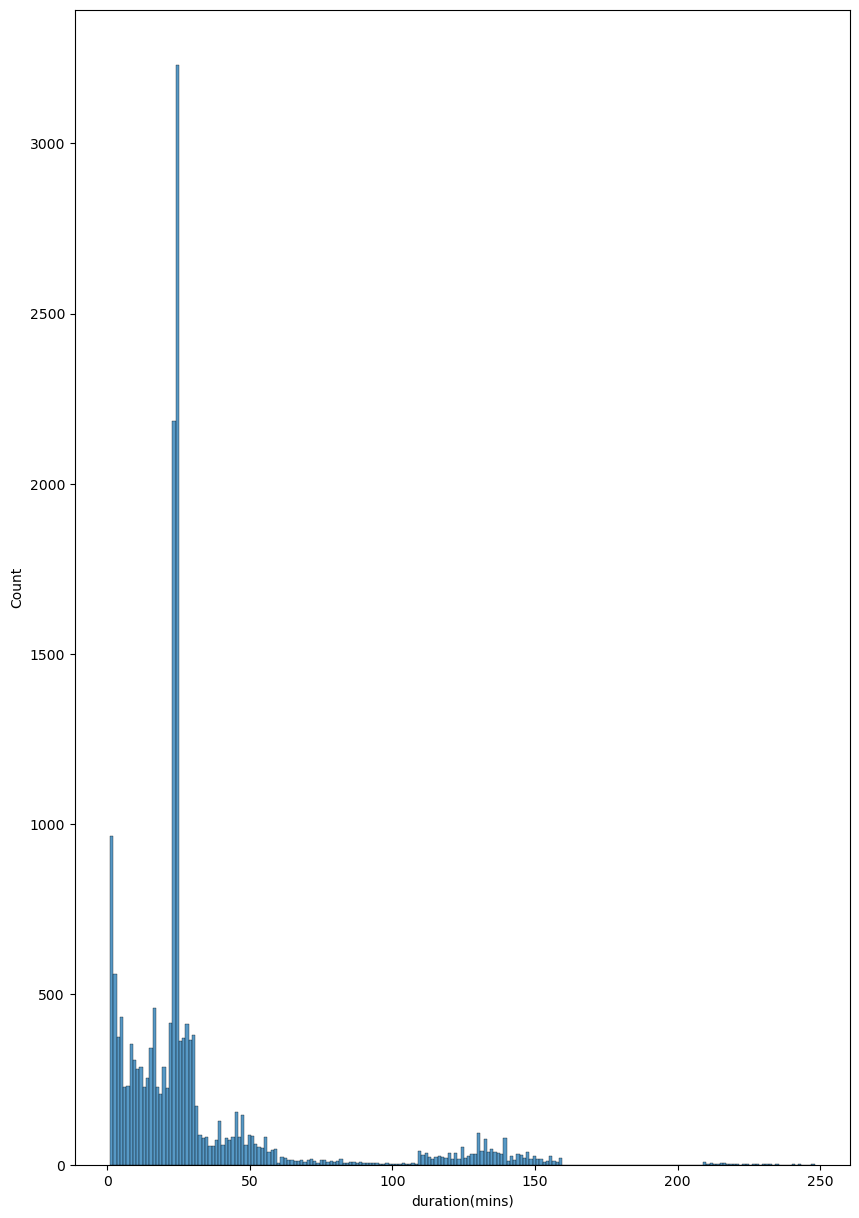

In [ ]:
plt.figure(figsize=(10,15))
sns.histplot(anime_df, x='duration(mins)')
plt.ylabel("Count")
plt.show()

### Analysis

- This plot makes sense since most of the shows have a duration butween 23-25 mins.

### Correlation Matrix for numerical predictors (Plot 1):

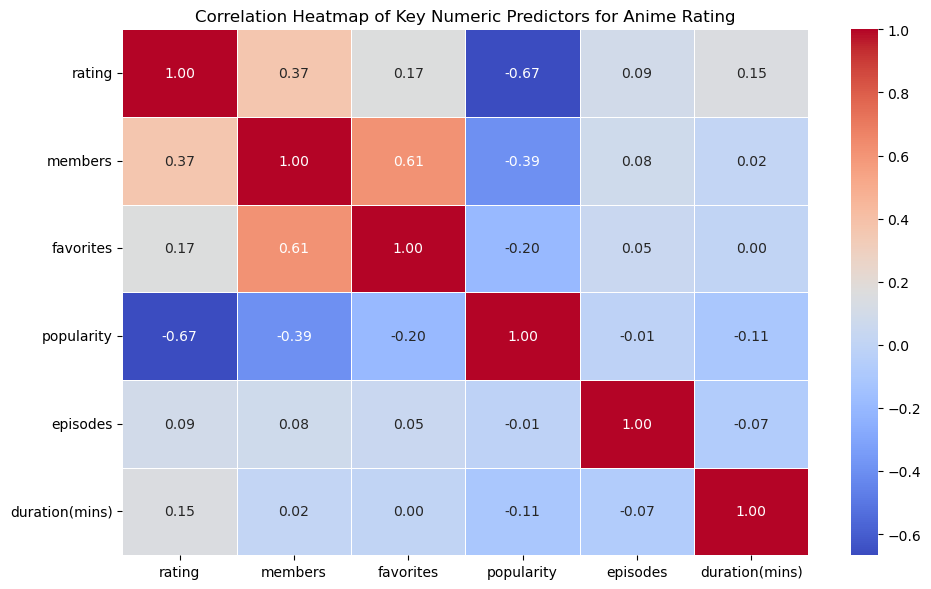

In [ ]:
numeric_cols = ["rating", "members", "favorites",
                "popularity", "episodes", "duration(mins)"]

corr = anime_df[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr,
    annot=True,        
    fmt=".2f",         
    linewidths=.6,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap of Key Numeric Predictors for Anime Rating")
plt.tight_layout()
plt.show()

In [ ]:
corr['rating'].sort_values(ascending=False)

rating            1.000000
members           0.365289
favorites         0.165919
duration(mins)    0.149594
episodes          0.091476
popularity       -0.667439
Name: rating, dtype: float64

### Analysis 
- When comparing our numerical variables the strongest pattern we observe is the large negative correlation (-.67) between popularity and rating. This relationship makes sense within the context of MyAnimeList's ranking system, where a lower popularity value indicates a more popular anime. Shows with large, active communities maintain strong ratings as they attract both susutained fan engagement and widespread viewership. 

- A less influential but still relevant predictor is members, which shows a mild positive correlation with rating. This suggests that anime with larger dedicated audiences tend to receive slightly higher scores. 

- One additional point of interest is the high correlation between members and favorites (0.61). This relationship is expected: users who favorite an anime are often part of the same active community that joins the member count. Because of this overlap in what they represent (audience engagement), including both variables in a predictive model may introduce redundancy without adding much new information.

### Scatter: Favorites vs Rating (Plot 2):

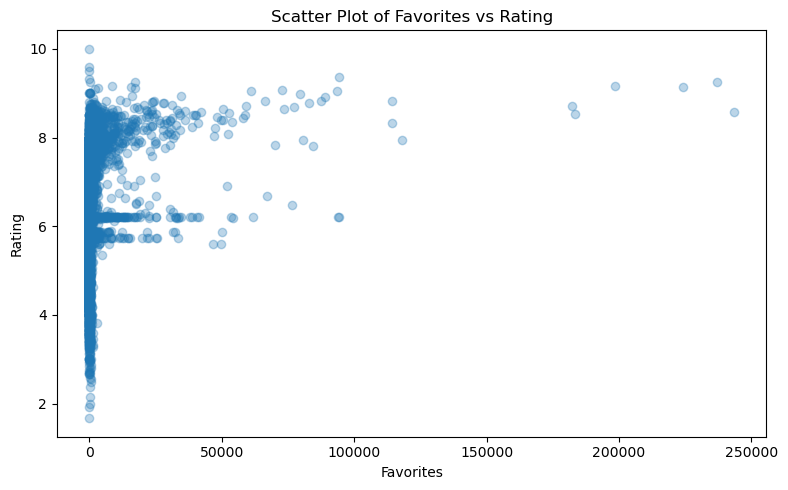

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(anime_df["favorites"], anime_df["rating"], alpha=0.3)
plt.xlabel("Favorites")
plt.ylabel("Rating")
plt.title("Scatter Plot of Favorites vs Rating")
plt.tight_layout()
plt.show()

### Analysis of Plot 2
- The plot shows substantial clustering at low favorite counts, indicating that the majority of anime receive relatively little fan engagement. Importantly, these titles span a wide range of ratings, demonstrating that low engagement does not necessarily imply low quality.

- A clear trend emerges once favorite counts exceed roughly 20,000: almost all anime in this range have ratings above 6. This suggests that shows with large, dedicated fan communities tend to maintain above-average scores, showing a link between strong fan engagement and perceived quality.

- The plot also highlights several outlier anime with exceptionally large numbers of favorites. Notably, these points almost exclusively fall within the 8 to 10 rating range. This pattern indicates that extremely popular titles are consistently regarded as high quality by the community.



### Box Plots for Categorcial Predictors (Plot 3):

#### Plot 3a. Rating by Type (TV, Movie, OVA, etc.)

<Figure size 800x500 with 0 Axes>

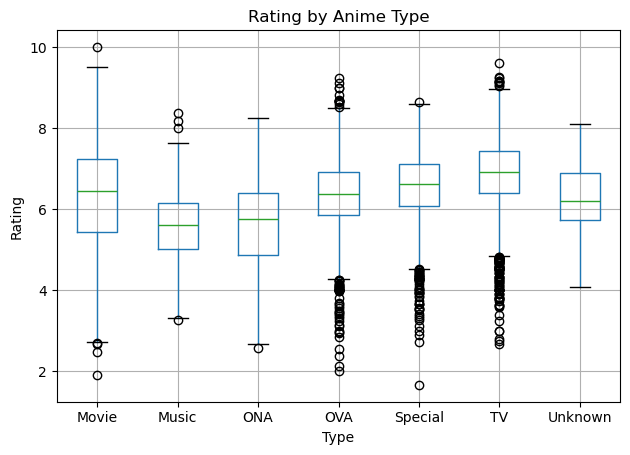

In [ ]:
plt.figure(figsize=(8, 5))

anime_df.boxplot(column="rating", by="type")
plt.title("Rating by Anime Type")
plt.suptitle("")    
plt.xlabel("Type")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

### Analysis Plot 3a.
- TV And movie formats show higher medians and tighter distibutions, suggesting that these mainstream formats tend to receive more consistent and favorable scores

- OVA and Special categories display longer whiskers and many more outliers, indicating greater inconsistency in quality. This makes sense, as OVAs and Specials often serve niche audiences, side stories, or promotional content

- Because the distribution shapes and medians differ noticeably, anime type appears to be a useful categorical variable for explaining variation in rating.

#### Plot 3b. Rating by Source (Manga, Light Novel, Original, etc.)

<Figure size 1000x500 with 0 Axes>

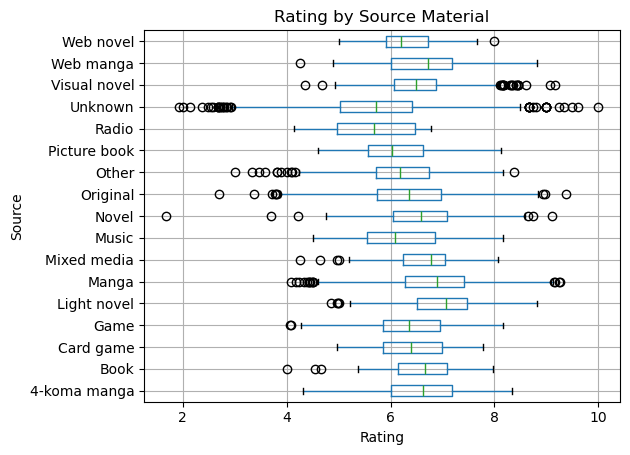

In [32]:
plt.figure(figsize=(10, 5))
# used vertical box plot to make ;longer source name readable
anime_df.boxplot(column="rating", by="source", vert=False,)
plt.title("Rating by Source Material")
plt.suptitle("")
plt.ylabel("Source")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

### Analysis of plot 3b.
- Both Manga-based and Light Novel–based anime show higher medians and less variable distributions, this matches common assumptions as the most popular types of sourses to be adaptated are manga and light novels. Meaning there adaptations often have pre-existing audiences, larger bugedets, and better alignment with viewer expectations.

- Original works span a large range of ratings. Some originals are highly acclaimed, while others score much lower. This reflects the higher creative risk associated with non-adapted stories.

- Games, gard games, music, and mixed media based anime tend to have lower scores as many lack established story structure, aim to be promotional pieces, or have smaller budgets.

- The difference in median rating, spread, and outlier behavior across categories suggest that source material is also an important variable in predicting rating.